# Author Name :- Kiran Vijay Patil

### Task 3 :- Exploratory Data Analysis on Super Market Data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm

In [2]:
data=pd.read_csv(r"C:\Users\ARJUN SALUNKHE\Documents\Kiran Patil\datasets\SampleSuperstore.csv")
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Data preprocessing

### Null values

In [5]:
#Check is any null value present in data.
data.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [6]:
#Check how many null Values present in data.
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Check Duplicate values from the data

In [7]:
# Check duplicates entries from the data.
data.duplicated().sum()

17

In [8]:
# Remove duplicates values from the dataframe.
data=data.drop_duplicates(keep=False)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
data.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

### Find out the shipping mode of the various stores

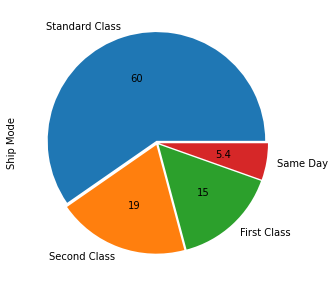

In [10]:
plt.figure(figsize=(10,5))
data["Ship Mode"].value_counts().plot(kind="pie",autopct="%1.2g",explode=[0.02]*4)
plt.show()

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


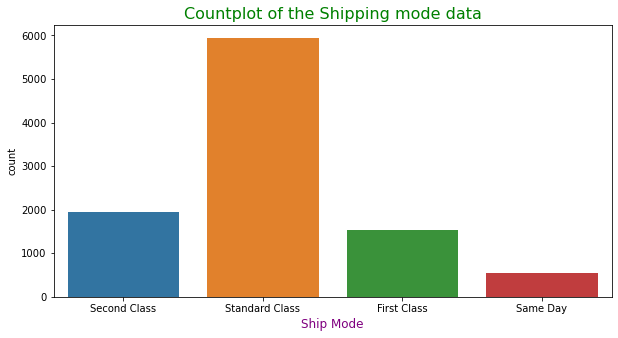

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data["Ship Mode"])
plt.title("Countplot of the Shipping mode data",fontsize="16",color="green")
plt.xlabel("Ship Mode",fontsize="12",color="purple")
plt.show()

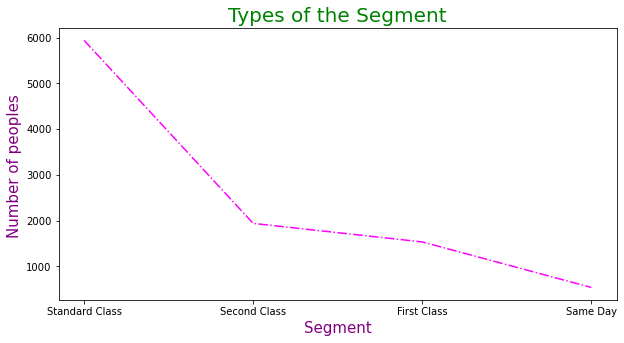

In [12]:
plt.figure(figsize=(10,5))
plt.plot(data["Ship Mode"].value_counts().head(),ls="-.",color="magenta")
plt.title("Types of the Segment",fontsize="20",color="green")
plt.xlabel("Segment",fontsize="15",color="purple")
plt.ylabel("Number of peoples ",fontsize="15",color="purple")
plt.show()

* Most of the Store owners use the Standard Class for the shipping the products.

### What types of Segments for stores.

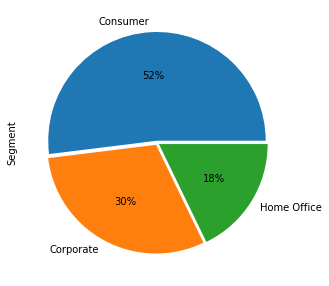

In [13]:
plt.figure(figsize=(10,5))
data["Segment"].value_counts().plot(kind="pie",autopct="%1.2g%%",explode=[0.02]*3)
plt.show()

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


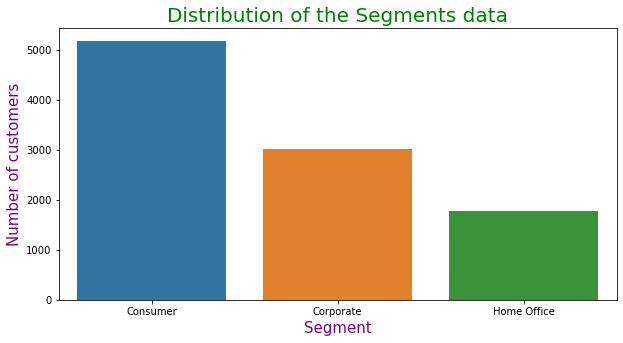

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data["Segment"])
plt.title("Distribution of the Segments data",fontsize="20",color="green")
plt.xlabel("Segment",fontsize="15",color="purple")
plt.ylabel("Number of customers",fontsize="15",color="purple")
plt.show()

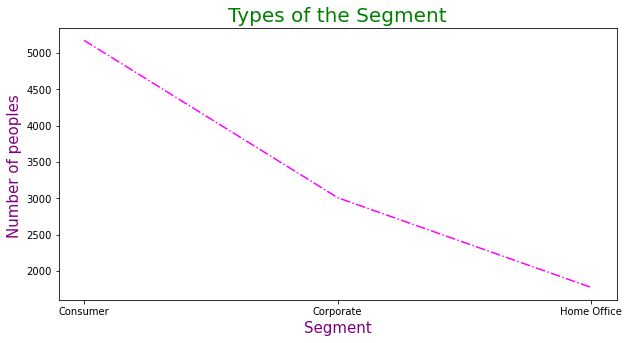

In [15]:
plt.figure(figsize=(10,5))
plt.plot(data["Segment"].value_counts().head(),ls="-.",color="magenta")
plt.title("Types of the Segment",fontsize="20",color="green")
plt.xlabel("Segment",fontsize="15",color="purple")
plt.ylabel("Number of peoples ",fontsize="15",color="purple")
plt.show()

* 52% segments are consumers.

### Who region peoples buys the maximum orders from the store.

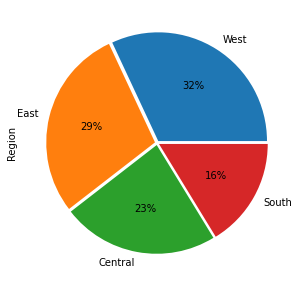

In [16]:
plt.figure(figsize=(10,5))
data["Region"].value_counts().plot(kind="pie",autopct="%1.2g%%",explode=[0.02]*4)
plt.show()

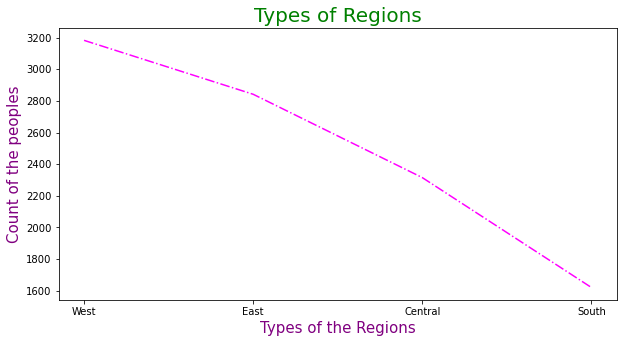

In [17]:
plt.figure(figsize=(10,5))
plt.plot(data["Region"].value_counts().head(),ls="-.",color="magenta")
plt.title("Types of Regions",fontsize="20",color="green")
plt.xlabel("Types of the Regions",fontsize="15",color="purple")
plt.ylabel("Count of the peoples",fontsize="15",color="purple")
plt.show()

* West region peoples has maximum orders from the store.

### Which Category types material orders by the people.

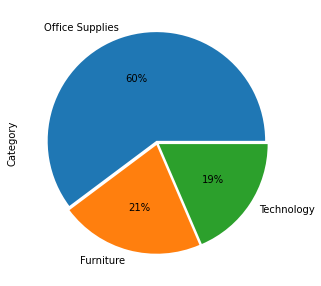

In [18]:
plt.figure(figsize=(10,5))
data["Category"].value_counts().plot(kind="pie",autopct="%1.2g%%",explode=[0.02]*3)
plt.show()

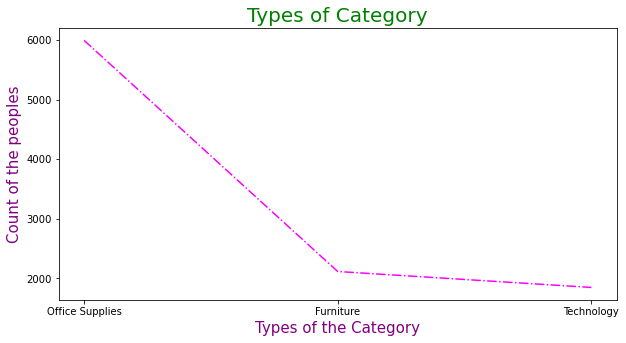

In [19]:
plt.figure(figsize=(10,5))
plt.plot(data["Category"].value_counts().head(),ls="-.",color="magenta")
plt.title("Types of Category",fontsize="20",color="green")
plt.xlabel("Types of the Category",fontsize="15",color="purple")
plt.ylabel("Count of the peoples",fontsize="15",color="purple")
plt.show()

* Office Supplies material is most ordered by the peoples.

### Top 5 States who can buys the maximum orders from the stores.

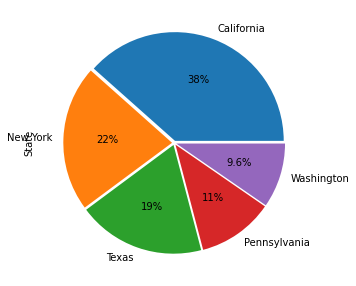

In [20]:
plt.figure(figsize=(10,5))
data["State"].value_counts().head().plot(kind="pie",autopct="%1.2g%%",explode=[0.02]*5)
plt.show()

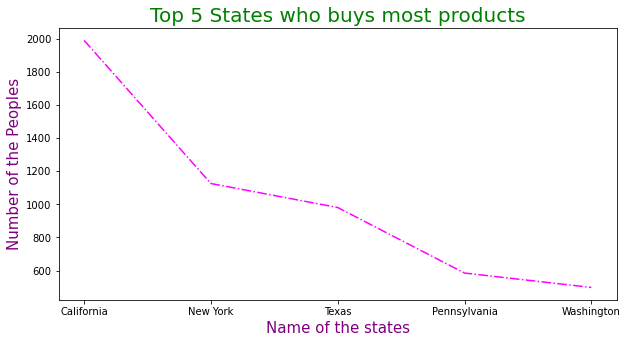

In [21]:
plt.figure(figsize=(10,5))
plt.plot(data["State"].value_counts().head(),ls="-.",color="magenta")
plt.title("Top 5 States who buys most products",fontsize="20",color="green")
plt.xlabel("Name of the states",fontsize="15",color="purple")
plt.ylabel("Number of the Peoples",fontsize="15",color="purple")
plt.show()

* California & New York cities peoples buys the maximum orders the stores.

### Top 5 Cities who can buys the maximum orders from the stores.

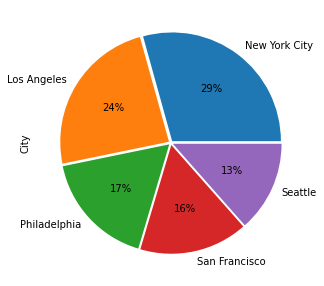

In [22]:
plt.figure(figsize=(10,5))
data["City"].value_counts().head().plot(kind="pie",autopct="%1.2g%%",explode=[0.02]*5)
plt.show()

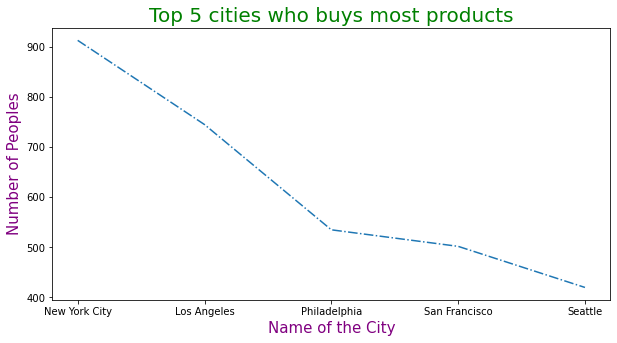

In [23]:
plt.figure(figsize=(10,5))
plt.plot(data["City"].value_counts().head(),ls="-.")
plt.title("Top 5 cities who buys most products",fontsize="20",color="green")
plt.xlabel("Name of the City",fontsize="15",color="purple")
plt.ylabel("Number of Peoples",fontsize="15",color="purple")
plt.show()

* Peoples who belongs to New York city buys most of the product from the Supermarket.

### Top 5 Sub-category which most used or buyed by the peoples.

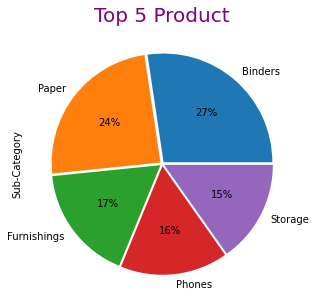

In [24]:
plt.figure(figsize=(10,5))
data["Sub-Category"].value_counts().head().plot(kind="pie",autopct="%1.2g%%",explode=[0.02]*5)
plt.title("Top 5 Product",fontsize="20",color="purple")
plt.show()

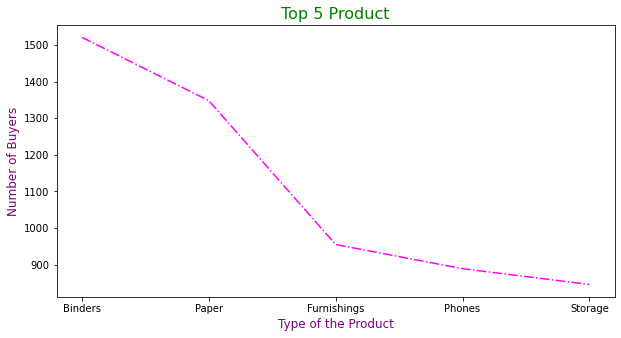

In [25]:
plt.figure(figsize=(10,5))
plt.plot(data["Sub-Category"].value_counts().head(),ls="-.",color="magenta")
plt.title("Top 5 Product",fontsize="16",color="green")
plt.xlabel("Type of the Product",fontsize="12",color="purple")
plt.ylabel("Number of Buyers",fontsize="12",color="purple")
plt.show()

* Blinders product mostly buyed by the peoples.

### Discount

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


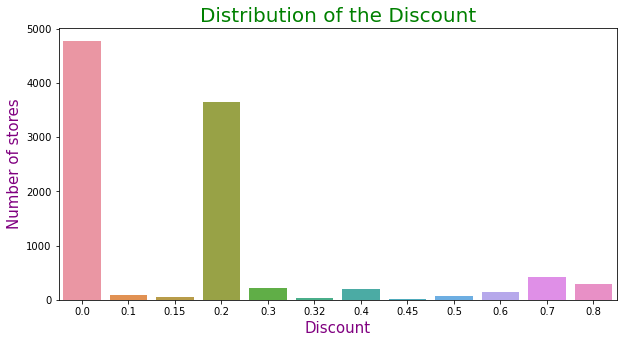

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data["Discount"])
plt.title("Distribution of the Discount",fontsize="20",color="green")
plt.xlabel("Discount",fontsize="15",color="purple")
plt.ylabel("Number of stores",fontsize="15",color="purple")
plt.show()

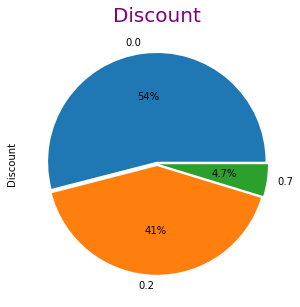

In [27]:
plt.figure(figsize=(10,5))
data["Discount"].value_counts().head(3).plot(kind="pie",autopct="%1.2g%%",explode=[0.02]*3)
plt.title("Discount",fontsize="20",color="purple")
plt.show()

In [28]:
data["Discount"].value_counts().head(3)

0.0    4776
0.2    3649
0.7     418
Name: Discount, dtype: int64

* 4798  (54%) stores gives no discount to the peoples.

In [29]:
le=LabelEncoder()
col=data.columns
for i in col:
    data[i]=le.fit_transform(data[i])

C:\Users\ARJUN SALUNKHE\AppData\Local\Temp\ipykernel_10564\1705589985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=le.fit_transform(data[i])


C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

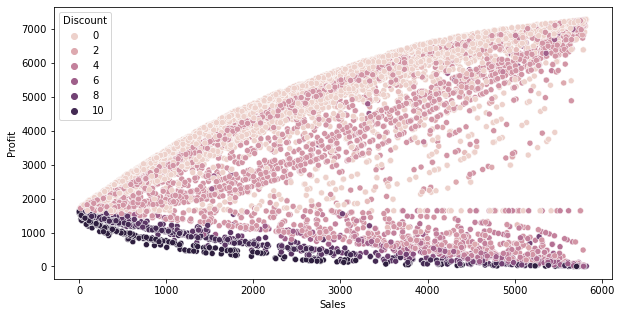

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot("Sales","Profit",hue="Discount",data=data)

* In above diagram we can see that if discount increases the profit of the stores decreases.

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

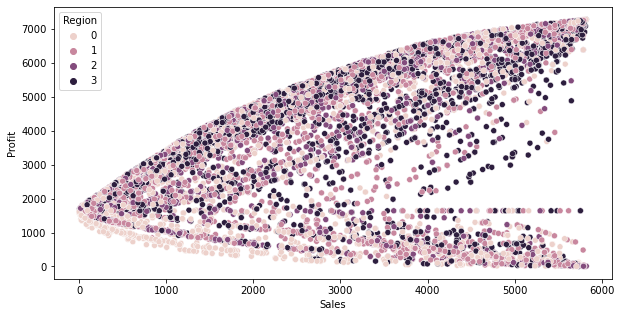

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot("Sales","Profit",hue="Region",data=data)

* Above diagram shows the scattering of the points with respect to the region.

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

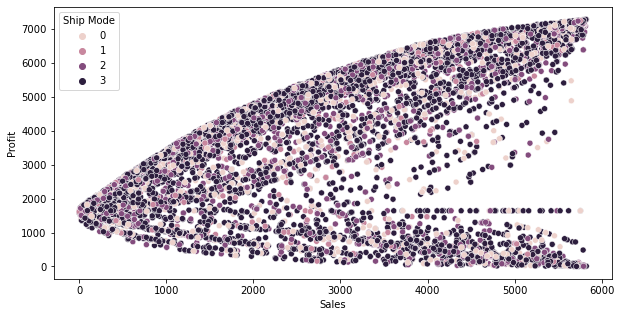

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot("Sales","Profit",hue="Ship Mode",data=data)

* Above diagram shows the scattering of the points with respect to the Shipping mode of the stores.

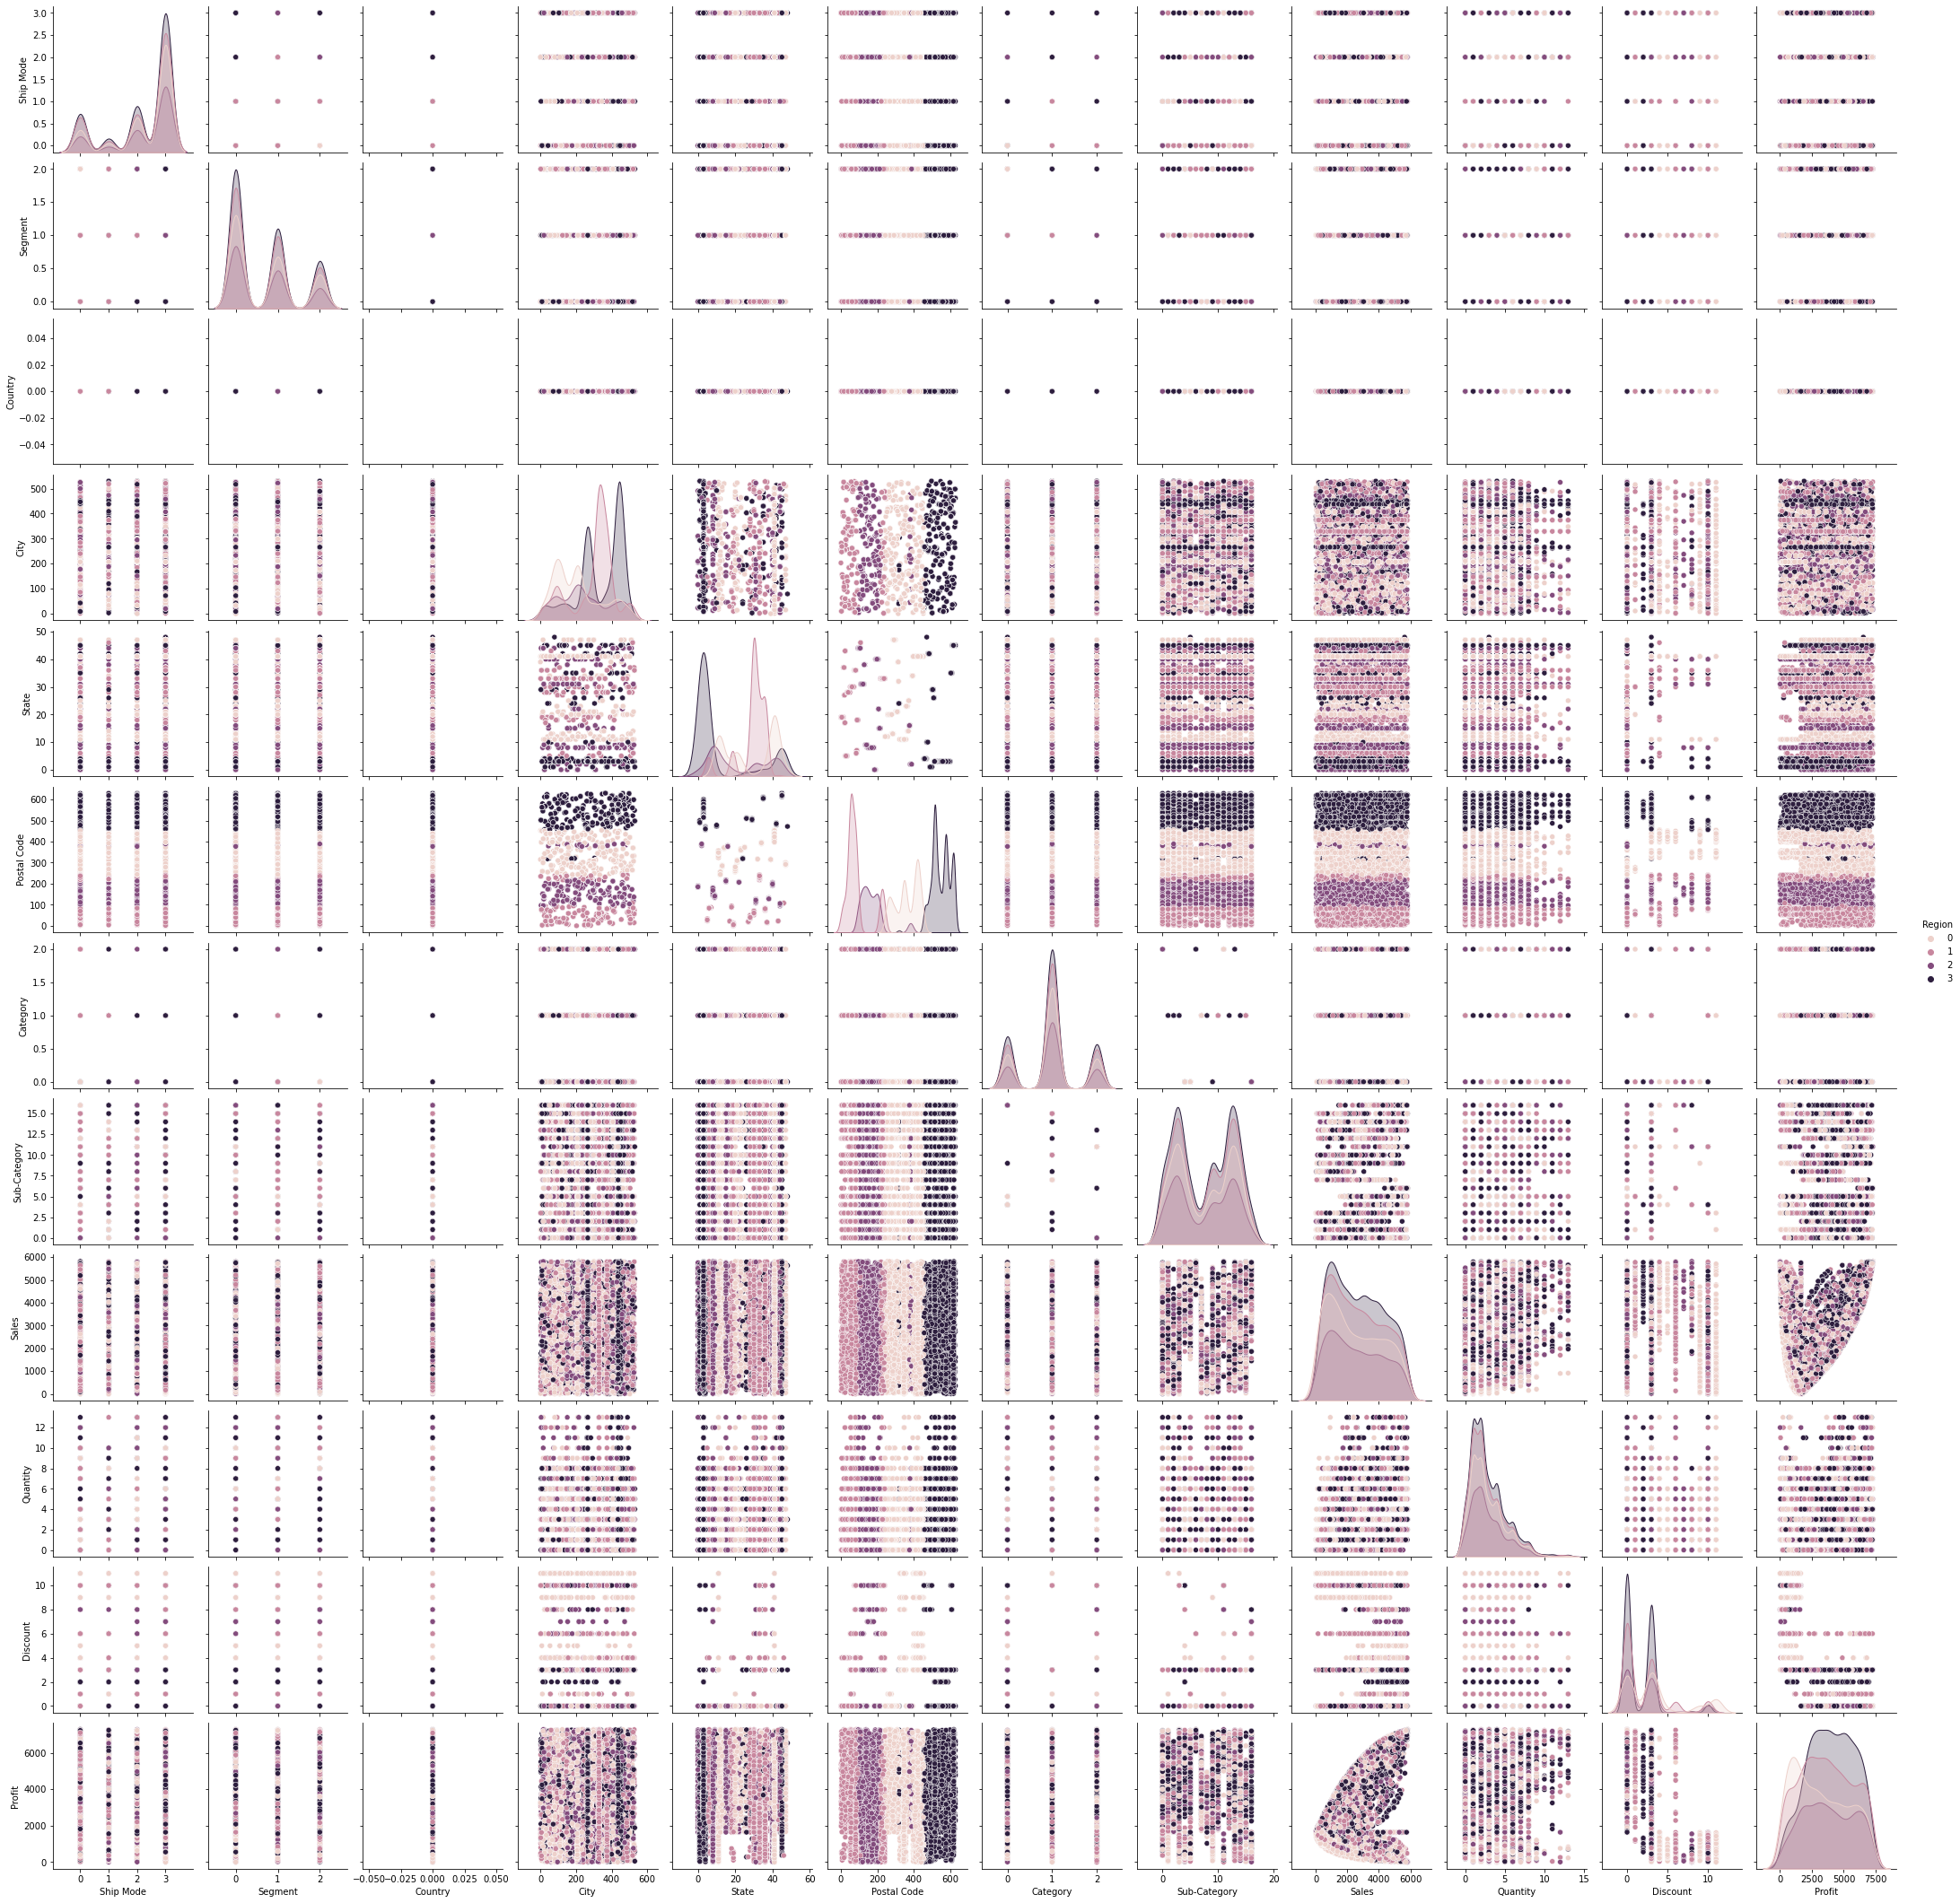

In [33]:
sns.pairplot(data,hue="Region")